In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [5]:
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [6]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [8]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [9]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


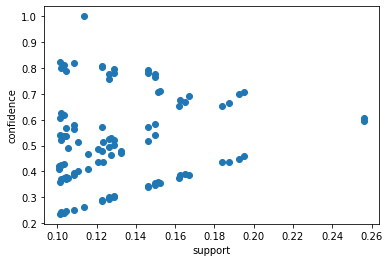

In [10]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [11]:
# With 20% Support
frequent_itemsets2=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [12]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


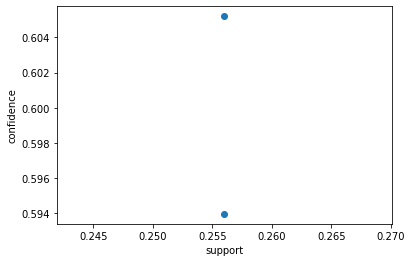

In [13]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [14]:
#Association rules with 5% Support and 80% confidence
frequent_itemsets3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, DoItYBks, GeogBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(DoItYBks, GeogBks, YouthBks, CookBks, ChildBks)"


In [15]:
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(DoItYBks, ChildBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(GeogBks),"(ArtBks, DoItYBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(CookBks),"(ArtBks, DoItYBks, ChildBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789


In [16]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(DoItYBks, ChildBks, GeogBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(GeogBks),"(ArtBks, DoItYBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(CookBks),"(ArtBks, DoItYBks, ChildBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789


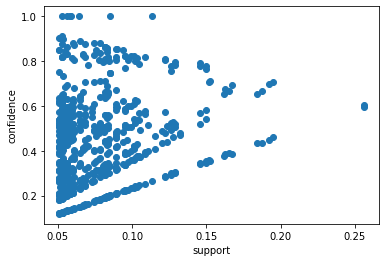

In [17]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()